In [1]:
%load_ext google.cloud.bigquery

In [2]:
# import os
# os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='/Users/colette/Documents/GitHub/More-BigQuery-with-Python/ApprenticeshipOAuth.json'

In [3]:
# %%bigquery
# SELECT * FROM `apprenticeship-299321.sample_data.datatable`
# LIMIT 10

In [27]:
# from google.oauth2 import service_account
# import pandas_gbq

# credentials = service_account.Credentials.from_service_account_file(
#     '/Users/colette/Documents/GitHub/More-BigQuery-with-Python/ApprenticeshipOAuth.json',
# )
# df = pandas_gbq.read_gbq(sql, project_id="apprenticeship-299321", credentials=credentials)

In [5]:
# from google.oauth2 import service_account

# SCOPES = ['https://www.googleapis.com/auth/sqlservice.admin']
# SERVICE_ACCOUNT_FILE = '/Users/colette/Documents/GitHub/More-BigQuery-with-Python/ApprenticeshipOAuth.json'

# credentials = service_account.Credentials.from_service_account_file(
#         SERVICE_ACCOUNT_FILE, scopes=SCOPES)

In [6]:
# import httplib2

# from oauth2client.client import flow_from_clientsecrets
# from oauth2client.file import Storage
# from oauth2client.tools import run_flow

# CLIENT_SECRET = '/Users/colette/Documents/GitHub/More-BigQuery-with-Python/ApprenticeshipOAuth.json'
# SCOPE = 'https://www.googleapis.com/auth/spreadsheets.readonly'
# STORAGE = Storage('credentials.storage')

# # Start the OAuth flow to retrieve credentials
# def authorize_credentials():
# # Fetch credentials from storage
#     credentials = STORAGE.get()
# # If the credentials doesn't exist in the storage location then run the flow
#     if credentials is None or credentials.invalid:
#         flow = flow_from_clientsecrets(CLIENT_SECRET, scope=SCOPE)
#         http = httplib2.Http()
#         credentials = run_flow(flow, STORAGE, http=http)
#     return credentials
# credentials = authorize_credentials()

I think I keep trying to use methods which accept "service account key", rather than "OAuth client ID".

In [7]:
import pydata_google_auth
credentials = pydata_google_auth.get_user_credentials(
    ['https://www.googleapis.com/auth/bigquery'],
)

In [8]:
query = """
    SELECT * FROM `apprenticeship-299321.sample_data.datatable`
    LIMIT 10
"""
project_id = 'apprenticeship-299321'

In [9]:
import pandas as pd
df = pd.read_gbq(query, project_id=project_id, dialect='standard', credentials=credentials)
df

,date,channelGrouping,deviceCategory,sessions,conversions
0,20180324,Email,mobile,32,0
1,20180518,Email,mobile,31,0
2,20180415,Email,mobile,29,0
3,20171206,Email,mobile,28,0
4,20180329,Email,mobile,27,0
5,20171227,Email,mobile,25,0
6,20180421,Email,mobile,24,0
7,20180127,Email,desktop,22,0
8,20170706,Email,mobile,20,0
9,20180519,Email,desktop,19,0


In [25]:
# %%bigquery
# SELECT * FROM `apprenticeship-299321.sample_data.datatable`
# LIMIT 10

In [ ]:
testQuery1 = """
    SELECT * FROM `apprenticeship-299321.sample_data.datatable`
    LIMIT 100
"""
df = pd.read_gbq(testQuery1, project_id=project_id, dialect='standard', credentials=credentials)
df

## All data (chronological):
(TODO: add titles for other cells)

In [ ]:
query0 = """
    SELECT * FROM `apprenticeship-299321.sample_data.datatable`
    ORDER BY date ASC
"""
df = pd.read_gbq(query0, project_id=project_id, dialect='standard', credentials=credentials)
df

In [ ]:
# skip this because it's unnecessary...

# query1 = """
#     SELECT COUNT(*) FROM `apprenticeship-299321.sample_data.datatable`
# """
# df = pd.read_gbq(query1, project_id=project_id, dialect='standard', credentials=credentials)
# df

<AxesSubplot:xlabel='deviceCategory'>

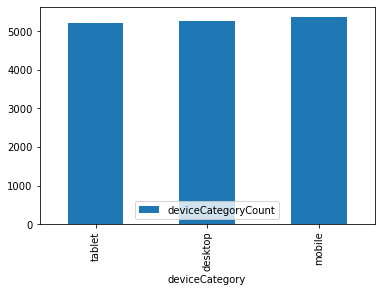

In [31]:
query2 = """
    SELECT deviceCategory, COUNT(*) AS deviceCategoryCount
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY deviceCategory
    ORDER BY deviceCategoryCount ASC
"""
df = pd.read_gbq(query2, project_id=project_id, dialect='standard', credentials=credentials)
# df.plot.line(x='deviceCategory', y='deviceCategoryCount')
df.plot.bar(x='deviceCategory', y='deviceCategoryCount')

<AxesSubplot:xlabel='channelGrouping'>

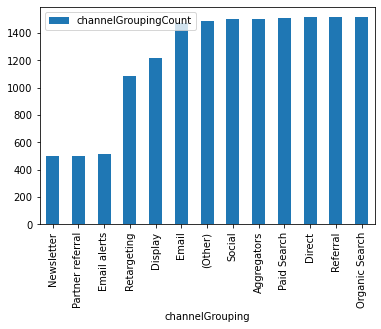

In [32]:
query3 = """
    SELECT channelGrouping, COUNT(*) AS channelGroupingCount
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY channelGrouping
    ORDER BY channelGroupingCount ASC
"""
df = pd.read_gbq(query3, project_id=project_id, dialect='standard', credentials=credentials)
df.plot.bar(x='channelGrouping', y='channelGroupingCount')

In [33]:
def runQuery(queryName):
    query = pd.read_gbq(queryName, project_id=project_id, dialect='standard', credentials=credentials)
    print(query)
    return query

         date  numberOf
0    20170101        30
1    20170102        30
2    20170103        30
3    20170104        30
4    20170105        30
..        ...       ...
500  20180516        33
501  20180517        33
502  20180518        34
503  20180519        34
504  20180520        34

[505 rows x 2 columns]


<AxesSubplot:xlabel='date'>

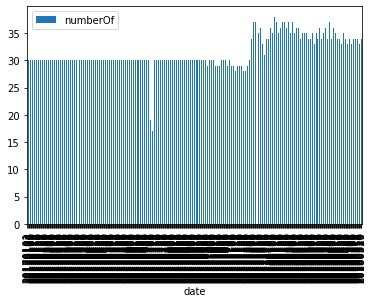

In [34]:
# um, what is this supposed to tell us?
# TODO: revisit this
query4 = """
    SELECT date, COUNT(*) as numberOf
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY date
    ORDER BY date ASC
"""
runQuery(query4).plot.bar(x='date', y='numberOf')

  deviceCategory  averageConversionsPerDeviceCategory
0         tablet                                 20.4
1         mobile                                 38.6
2        desktop                                 53.7


<AxesSubplot:xlabel='deviceCategory'>

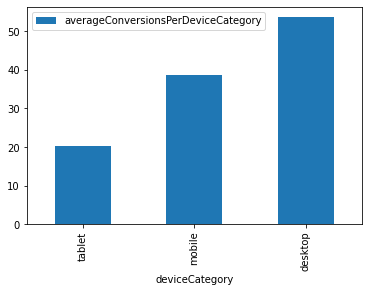

In [35]:
# this is rounded to 1 decimal place, while other data is rounded to 4 -
# this is because ideally I'd have used significant figures
query5 = """
    SELECT deviceCategory, ROUND(AVG(conversions), 1) as averageConversionsPerDeviceCategory
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY deviceCategory
    ORDER BY averageConversionsPerDeviceCategory
"""
runQuery(query5).plot.bar(x='deviceCategory', y='averageConversionsPerDeviceCategory')

  deviceCategory  conversionRatePerDeviceCategory
0         mobile                           0.0261
1        desktop                           0.0430
2         tablet                           0.0551


<AxesSubplot:xlabel='deviceCategory'>

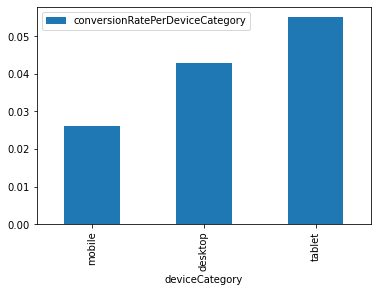

In [36]:
query6 = """
    SELECT deviceCategory, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRatePerDeviceCategory
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY deviceCategory
    ORDER BY conversionRatePerDeviceCategory
"""
runQuery(query6).plot.bar(x='deviceCategory', y='conversionRatePerDeviceCategory')

     channelGrouping  conversionRatePerChannelGrouping
0             Social                            0.0287
1            (Other)                            0.0344
2         Newsletter                            0.0350
3        Paid Search                            0.0350
4             Direct                            0.0354
5              Email                            0.0357
6        Aggregators                            0.0358
7       Email alerts                            0.0358
8     Organic Search                            0.0368
9           Referral                            0.0370
10       Retargeting                            0.0387
11  Partner referral                            0.0399
12           Display                            0.0444


<AxesSubplot:xlabel='channelGrouping'>

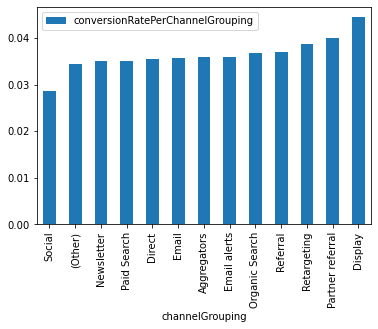

In [37]:
query7 = """
    SELECT channelGrouping, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRatePerChannelGrouping
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY channelGrouping
    ORDER BY conversionRatePerChannelGrouping
"""
runQuery(query7).plot.bar(x='channelGrouping', y='conversionRatePerChannelGrouping')

         date  conversionRate
0    20170101          0.0313
1    20170102          0.0308
2    20170103          0.0372
3    20170104          0.0317
4    20170105          0.0400
..        ...             ...
500  20180516          0.0399
501  20180517          0.0345
502  20180518          0.0390
503  20180519          0.0342
504  20180520          0.0382

[505 rows x 2 columns]


<AxesSubplot:xlabel='date'>

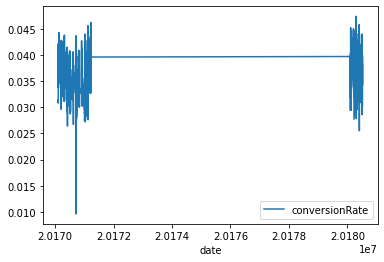

In [38]:
query8 = """
    SELECT date, ROUND((AVG(conversions))/(AVG(sessions)), 4) as conversionRate
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY date
    ORDER BY date ASC
"""
runQuery(query8).plot.line(x='date', y='conversionRate')
# TODO: revisit - date is an integer, so this doesn't show up properly

         date  totalSessions
0    20170101          17367
1    20170102          27842
2    20170103          42792
3    20170104          42956
4    20170105          43019
..        ...            ...
500  20180516          32012
501  20180517          26716
502  20180518          22831
503  20180519          14260
504  20180520          17993

[505 rows x 2 columns]


<AxesSubplot:xlabel='date'>

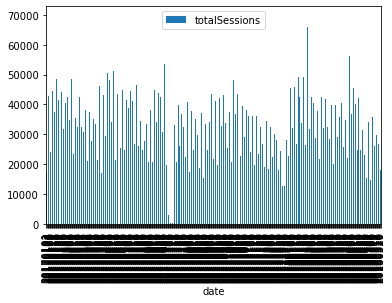

In [39]:
query9 = """
    SELECT date, SUM(sessions) as totalSessions
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY date
    ORDER BY date ASC
"""
runQuery(query9).plot.bar(x='date', y='totalSessions')
# TODO: revisit - bar graphs treat the date x-axis in a more logical way, but really it should be a line graph

In [20]:
# %load_ext sql

In [28]:
# %%bigquery
query10 = """
    SELECT date, SUM(conversions) as totalConversions
    FROM `apprenticeship-299321.sample_data.datatable`
    GROUP BY date
    ORDER BY date ASC
"""
# runQuery(query10)
# result10 = %sql $query10

         date  totalConversions
0    20170101               544
1    20170102               857
2    20170103              1590
3    20170104              1361
4    20170105              1719
..        ...               ...
500  20180516              1278
501  20180517               922
502  20180518               891
503  20180519               488
504  20180520               688

[505 rows x 2 columns]


In [40]:
# %matplotlib inline